In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from statsmodels.tsa.deterministic import DeterministicProcess
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv(
    "/content/weatherAUS.csv",
  #  index_col='Date',
    parse_dates=['Date'])

df =df.set_index("Date").to_period('D')

In [3]:
Sale = df[df['Location'] == 'Sale']
Sale.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,,,
2009-01-01,Sale,10.7,22.1,0.0,10.0,11.5,WSW,76.0,W,WSW,...,46.0,62.0,1001.7,1003.4,4.0,6.0,18.4,16.7,No,No
2009-01-02,Sale,8.0,18.9,0.0,NaN,11.7,W,50.0,W,WSW,...,61.0,36.0,1016.2,1017.3,3.0,6.0,12.5,16.7,No,No
2009-01-03,Sale,4.2,20.0,0.0,4.0,9.1,ESE,33.0,WNW,ESE,...,63.0,43.0,1020.9,1018.0,1.0,6.0,12.9,18.8,No,No
2009-01-04,Sale,6.7,24.3,0.0,5.0,10.5,ESE,33.0,SSW,E,...,70.0,47.0,1017.0,1013.4,3.0,5.0,16.4,23.2,No,No
2009-01-05,Sale,8.9,27.9,0.0,6.8,10.8,ENE,37.0,WNW,SE,...,79.0,52.0,1011.4,1008.9,6.0,1.0,15.9,25.5,No,No


In [ ]:
Sale.Temp3pm.notna().sum()

In [21]:
# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 5))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)
%config InlineBackend.figure_format = 'retina'



<ipython-input-21-e8132131478e>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


In [22]:
def seasonal_plot(X, y, period, freq, ax=None):
    if ax is None:
        _, ax = plt.subplots()
    palette = sns.color_palette("husl", n_colors=X[period].nunique(),)
    ax = sns.lineplot(
        x=freq,
        y=y,
        hue=period,
        data=X,
        ci=False,
        ax=ax,
        palette=palette,
        legend=False,
    )
    ax.set_title(f"Seasonal Plot ({period}/{freq})")
    for line, name in zip(ax.lines, X[period].unique()):
        y_ = line.get_ydata()[-1]
        ax.annotate(
            name,
            xy=(1, y_),
            xytext=(6, 0),
            color=line.get_color(),
            xycoords=ax.get_yaxis_transform(),
            textcoords="offset points",
            size=14,
            va="center",
        )
    return ax


def plot_periodogram(ts, detrend='linear', ax=None):
    from scipy.signal import periodogram
    fs = pd.Timedelta("365D") / pd.Timedelta("1D")
    freqencies, spectrum = periodogram(
        ts,
        fs=fs,
        detrend=detrend,
        window="boxcar",
        scaling='spectrum',
    )
    if ax is None:
        _, ax = plt.subplots()
    ax.step(freqencies, spectrum, color="purple")
    ax.set_xscale("log")
    ax.set_xticks([1, 2, 4, 6, 12, 26, 52, 104])
    ax.set_xticklabels(
        [
            "Annual (1)",
            "Semiannual (2)",
            "Quarterly (4)",
            "Bimonthly (6)",
            "Monthly (12)",
            "Biweekly (26)",
            "Weekly (52)",
            "Semiweekly (104)",
        ],
        rotation=30,
    )
    ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
    ax.set_ylabel("Variance")
    ax.set_title("Periodogram")
    return ax


In [12]:
data = pd.DataFrame(Sale['Temp3pm'])
data.dropna(inplace=True)

In [14]:
data.head()

,Temp3pm
Date,
2009-01-01,16.7
2009-01-02,16.7
2009-01-03,18.8
2009-01-04,23.2
2009-01-05,25.5


## Let's take a look at seasonal plots over a week and over a year.

In [18]:
X = data.copy()

# days within a week

X['day'] = X.index.dayofweek  # the x-axis (freq)
X['week'] = X.index.week  # the seasonal period

# days within a year
X['dayofyear'] = X.index.dayofyear
X['year'] = X.index.year


In [26]:
X['month'] = X.index.month

<ipython-input-22-4181c209cea6>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  ax = sns.lineplot(
<ipython-input-22-4181c209cea6>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  ax = sns.lineplot(


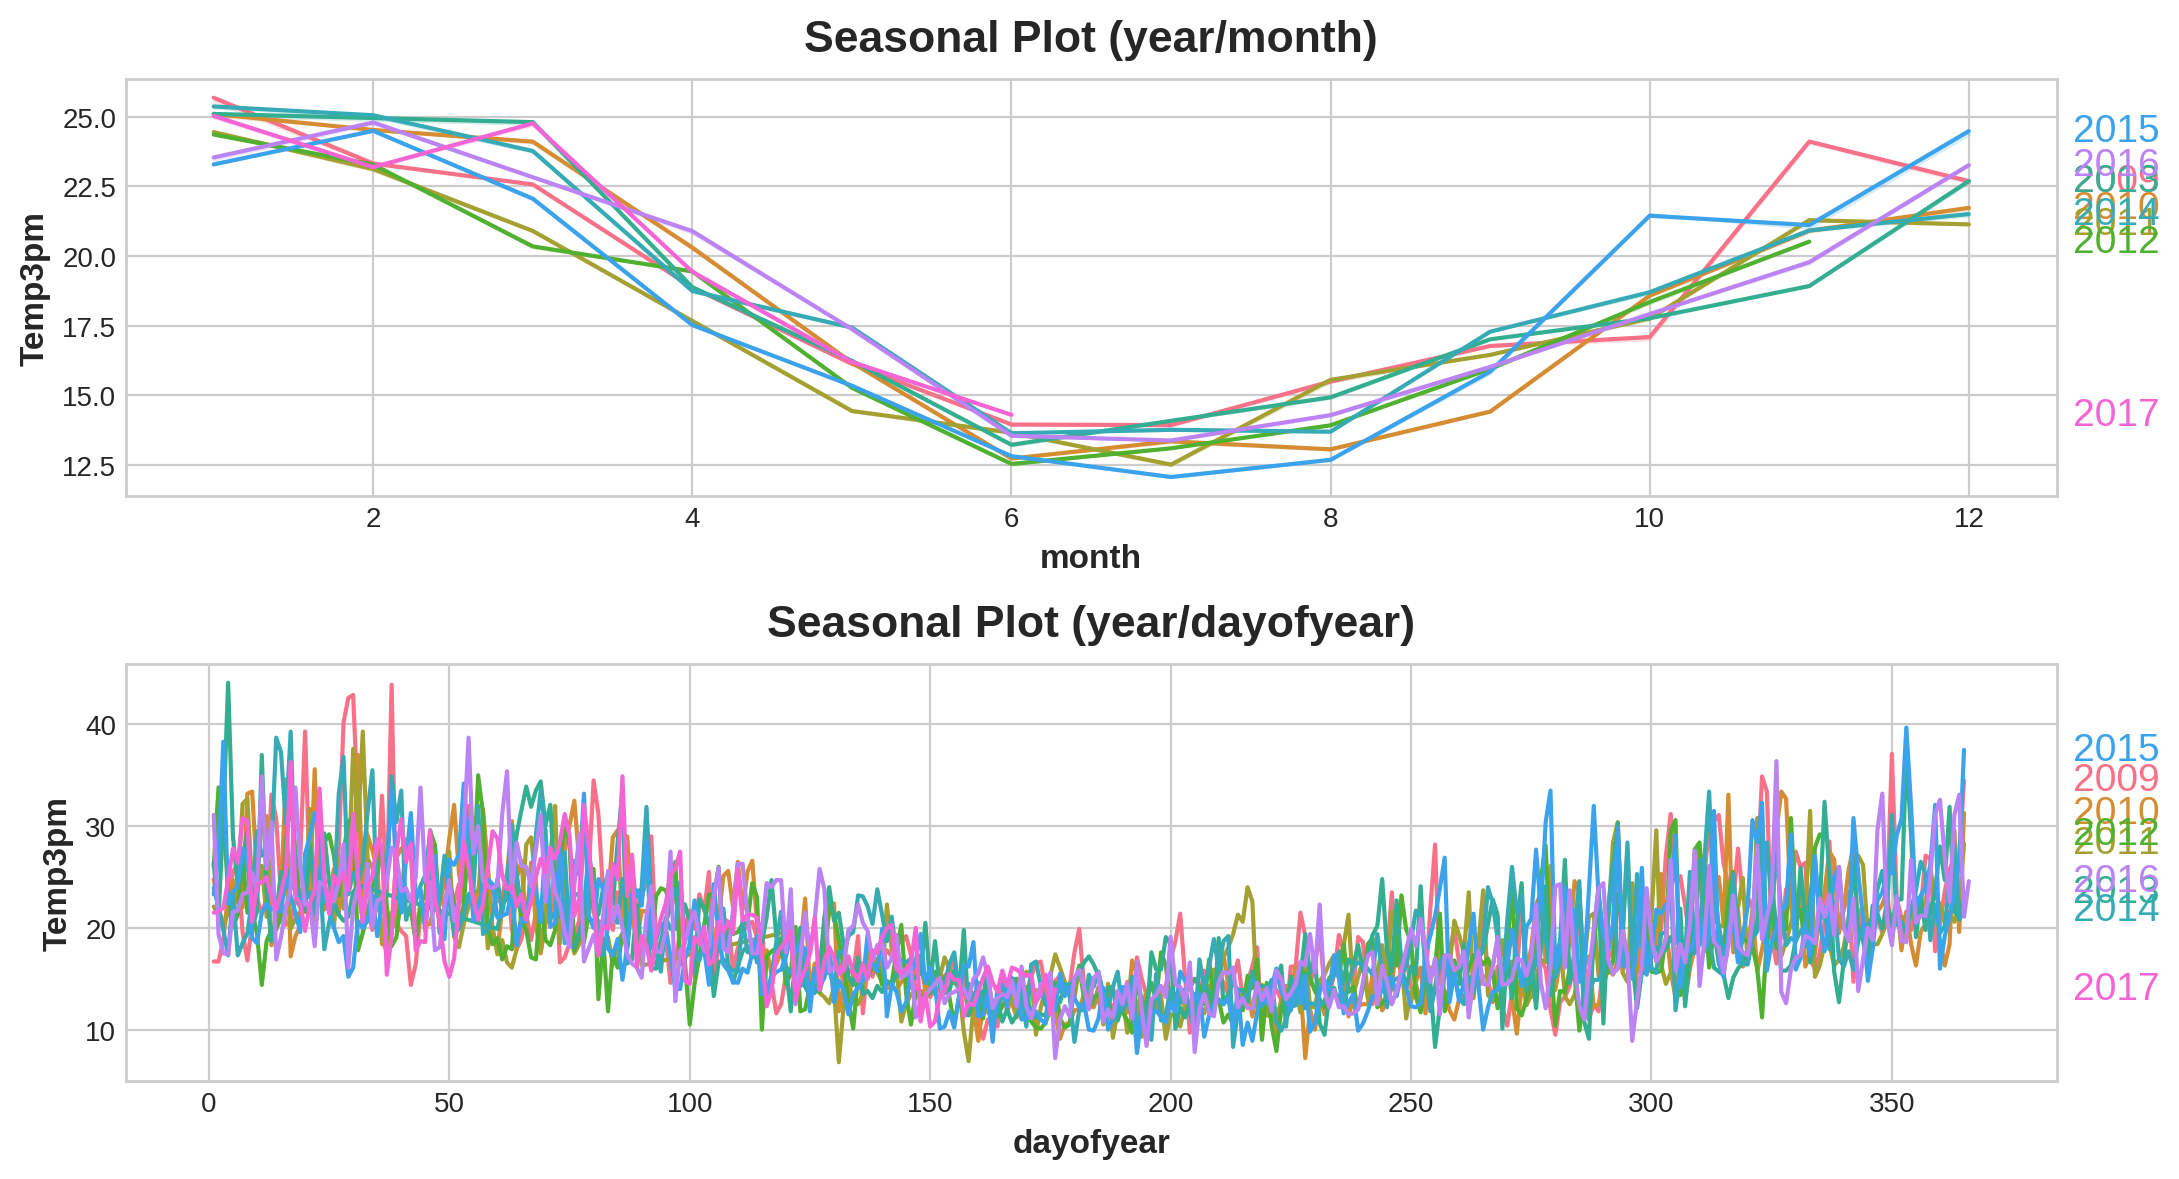

In [30]:
fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(11, 6))
seasonal_plot(X, y="Temp3pm", period="year", freq="month", ax=ax0)
seasonal_plot(X, y="Temp3pm", period="year", freq="dayofyear", ax=ax1);

## Taking a look at the periodogram

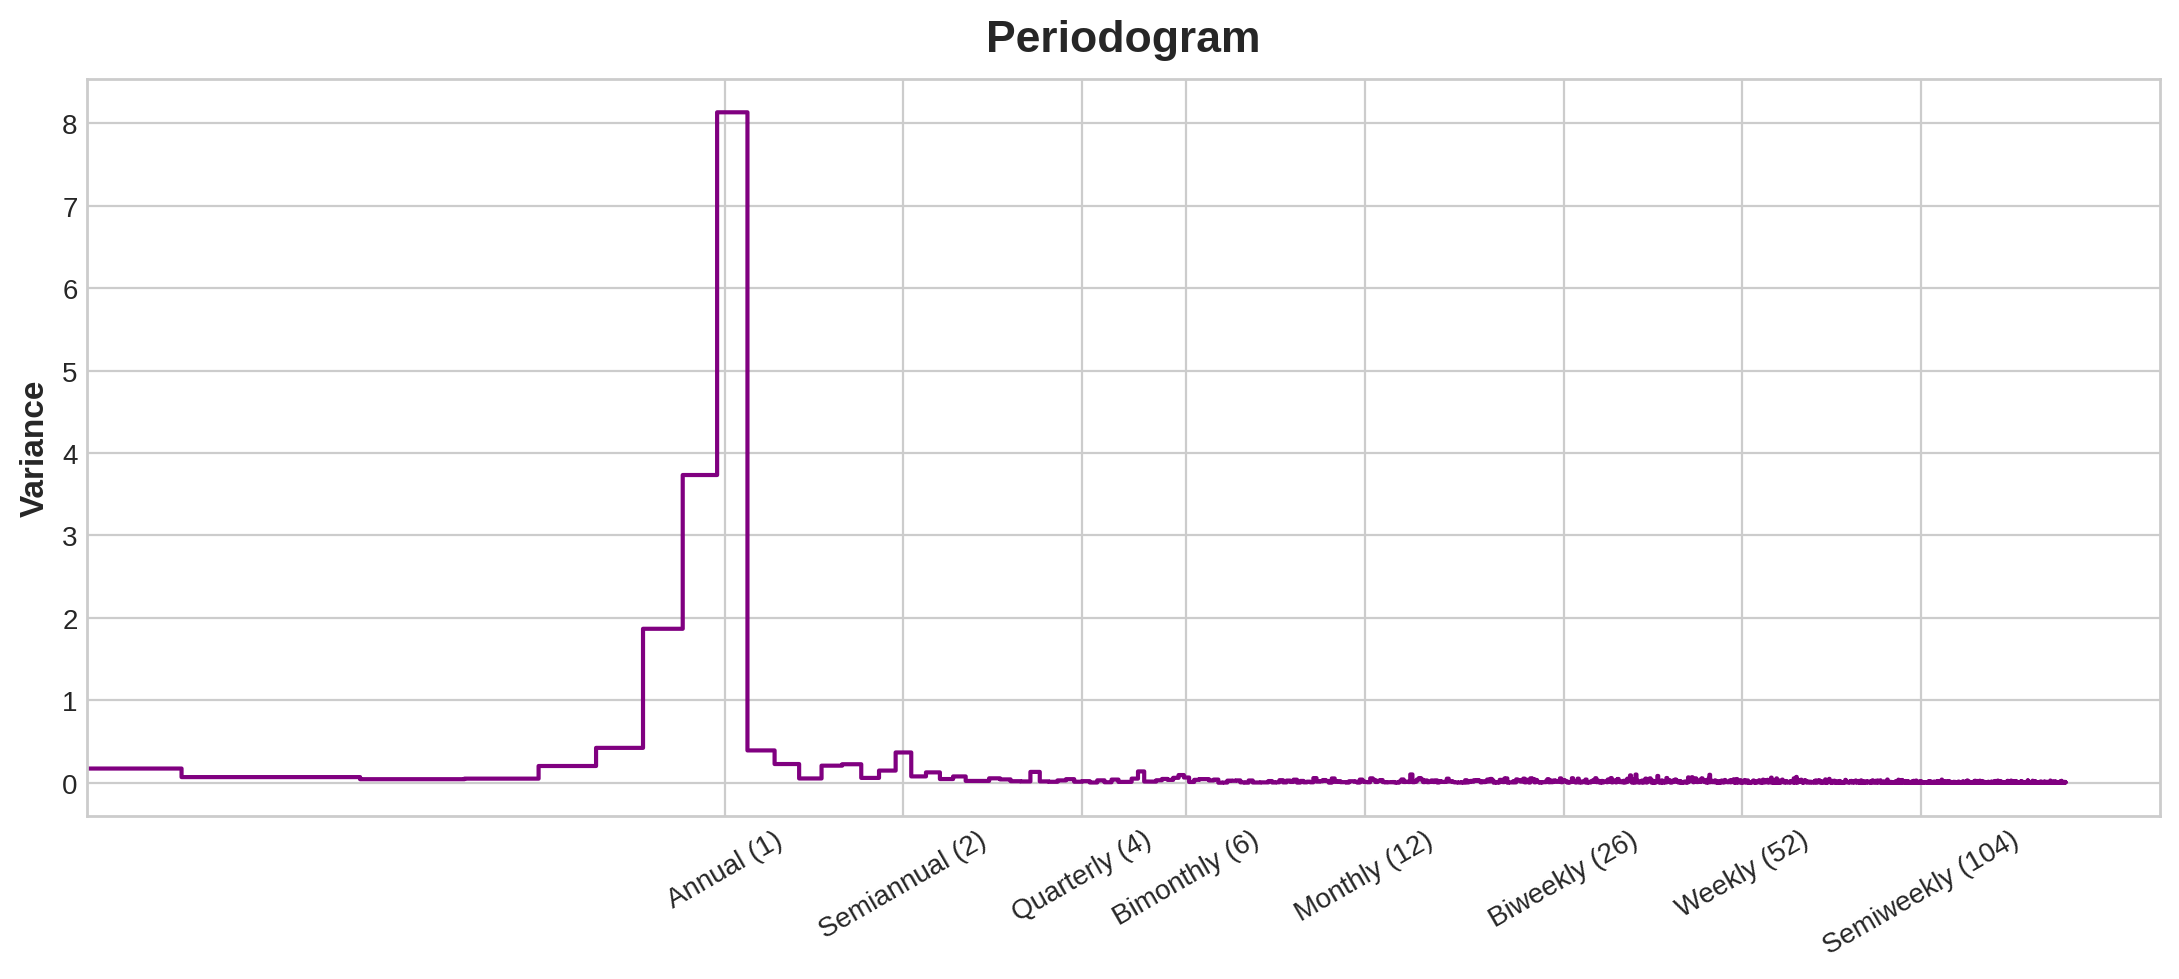

In [31]:
plot_periodogram(data.Temp3pm);

In [49]:
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess

fourier = CalendarFourier(freq="A", order=20)  # 20 sin/cos pairs for "A"nnual seasonality

dp = DeterministicProcess(
    index=data.index,
    constant=True,               # dummy feature for bias (y-intercept)
    order=1,                     # trend (order 1 means linear)
    seasonal=True,               # weekly seasonality (indicators)
    additional_terms=[fourier],  # annual seasonality (fourier)
    drop=True,                   # drop terms to avoid collinearity
)

X = dp.in_sample()  # create features for dates in tunnel.index

## Making a forecast for 300 days.

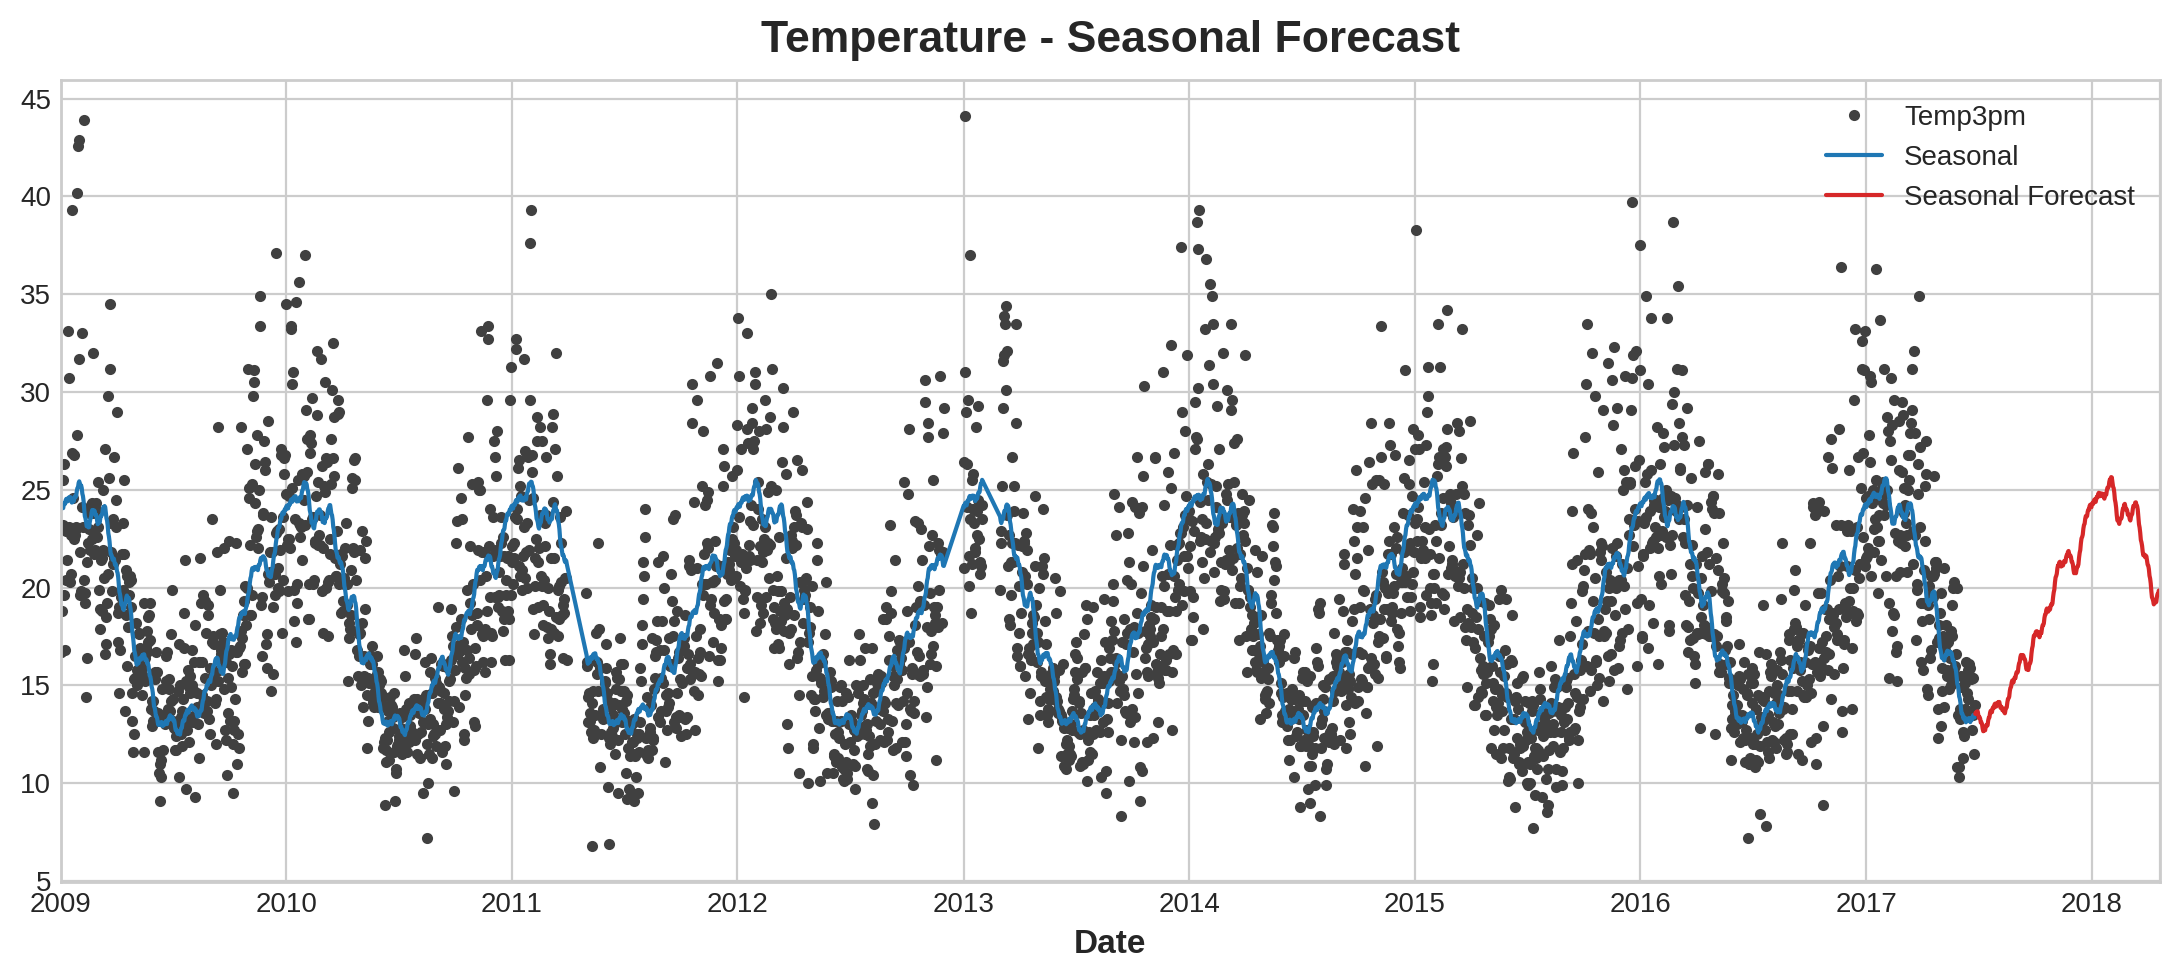

In [50]:
y = data["Temp3pm"]

model = LinearRegression(fit_intercept=False)
_ = model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=y.index)
X_fore = dp.out_of_sample(steps=300)
y_fore = pd.Series(model.predict(X_fore), index=X_fore.index)

ax = y.plot(color='0.25', style='.', title="Temperature - Seasonal Forecast")
ax = y_pred.plot(ax=ax, label="Seasonal")
ax = y_fore.plot(ax=ax, label="Seasonal Forecast", color='C3')
_ = ax.legend()